In [3]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

import matplotlib.pyplot as plt

In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:
x_train.reshape(60000,28,28,1)
x_test.reshape(10000,28,28,1)

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [6]:
from tensorflow.keras.utils import to_categorical
ycat_train = to_categorical(y_train,10)
ycat_test = to_categorical(y_test,10)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D, Flatten, Dropout
convModel = Sequential([
    Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1),padding='SAME', activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=65,kernel_size=(4,4),input_shape=(28,28,1),padding='SAME'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=265,batch_size=16,activation='relu'),
    Dropout(0.2),
    Dense(units=64,batch_size=8,activation='tanh'),
    Dropout(0.2),
    Dense(units=10, activation='softmax')
])
convModel.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
earlyStopCallback = EarlyStopping(monitor = 'val_loss',patience=2)
convModel.fit(x_train,ycat_train,epochs=200,validation_data=[x_test,ycat_test],callbacks=[earlyStopCallback])


Epoch 1/200


1875/1875 [==============================] - 50s 25ms/step - loss: 0.4052 - accuracy: 0.8536 - val_loss: 0.3157 - val_accuracy: 0.8808
Epoch 2/200
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2683 - accuracy: 0.9041 - val_loss: 0.2740 - val_accuracy: 0.9047
Epoch 3/200
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2293 - accuracy: 0.9171 - val_loss: 0.2670 - val_accuracy: 0.9058
Epoch 4/200
1875/1875 [==============================] - 136s 73ms/step - loss: 0.2008 - accuracy: 0.9273 - val_loss: 0.2717 - val_accuracy: 0.9095
Epoch 5/200
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1825 - accuracy: 0.9359 - val_loss: 0.2581 - val_accuracy: 0.9153
Epoch 6/200
1875/1875 [==============================] - 55s 30ms/step - loss: 0.1571 - accuracy: 0.9457 - val_loss: 0.2847 - val_accuracy: 0.9135
Epoch 7/200
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1437 - accuracy: 0.9510 - val_loss

<Axes: >

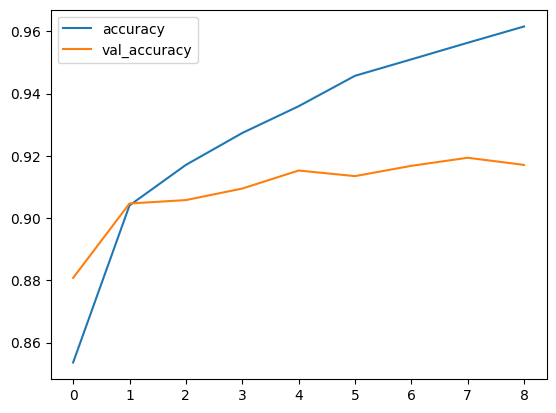

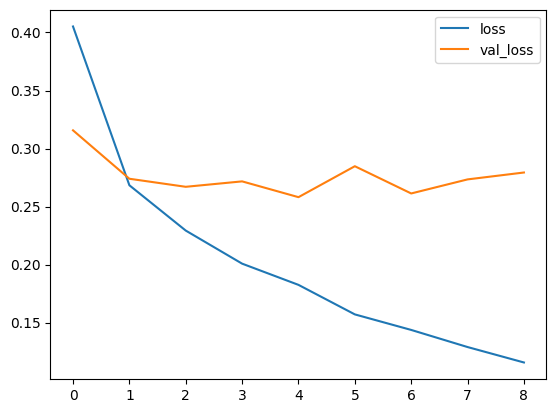

In [11]:
import pandas as pd
metrics = pd.DataFrame(convModel.history.history)
metrics.columns
metrics[['accuracy','val_accuracy']].plot()
metrics[['loss','val_loss']].plot()


In [26]:
import numpy 
from sklearn.metrics import classification_report, confusion_matrix
pred = (convModel.predict(x_test)).astype(int)
print(classification_report(ycat_test,pred))


313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

   micro avg       0.00      0.00      0.00     10000
   macro avg       0.00      0.00      0.00     10000
weighted avg       0.00      0.00      0.00     10000
 samples avg       0.00      0.00      0.00     10000



c:\Users\alife\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alife\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alife\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie